# IPL ESPN Cricinfo Team Standing Prediction ML Project

## Data Collection Driver Code Notebook

__Problem Statement:__
Given the performance statistics of an IPL player, predict what position might the player's team secure in that year.

> # Completion Table
| __TASKS__ | __STATUS__ |
| --- | --- |
| __Creating a Problem Statement__ | Completed |
| __Creating an Uncleaned Dataset__ | Completed |
| __Data Preprocessing__ | Incomplete |
| __Model Building*__| Incomplete |
| __Hyper Parameter Tuning__| Incomplete|
| __ROC Curve__| Incomplete|

__*__ Models to be created include __KNN, Logistic Regression, Decision Tree , Random Forest, SVM, Naive Bayes__

---
> # Classification Capstone Project Tasks
- Identifying a domain with a problem which can be addressed using Prediction Techniques.
- Creating a Dataset for classification with minimum 20 Features and 100 rows. The Data is scrapped from espn cricinfo's website.
- Ensure the dataset has all possible combination of feature where data preprocessing techniques can be applied ( Data Cleaning, Dimensionality Reduction, Data Transformation, Feature Engineering).
- Applying all the categories of classification algorithm( KNN, Logistic Regression, Decision Tree, Random Forest, SVM, Naïve Bayes) along with hyper parameter tuning and measure through best suited evaluation metric.
- Using the ROC curve to determine the best algorithm for your dataset.

---

# Data Sourcing / Collection (Datasets Creation through Webscraping)

---

# URL Adjustments being made for Web-Scrapping (scrape_espn_cricinfo.py)

#### Sample ESPN CRICINFO URL
**Year: 2008<br> Team: Royal Challengers Bangalore**<br>
- Batting: https://stats.espncricinfo.com/ci/engine/records/batting/most_runs_career.html?id=3519;team=4340;type=tournament
- Bowling:https://stats.espncricinfo.com/ci/engine/records/bowling/most_wickets_career.html?id=3519;team=4340;type=tournament


### Note: Exceptions
These following teams are either new entrants, defunct, or were suspended in between seasons, so upon trying to webscrape the following, we will be thrown an error or will receive an empty dataset.<br>
1. **Decan Chargers**
2. **Pune Warriors India** 
3. **Kochi Tuskers Kerala**
4. **Gujarat Lions**
5. **Rising Pune Supergiants**
6. **Lucknow Super Giants**
7. **Gujarat Titans**
8. **Chennai Super Kings**
9. **Rajasthan Royals**

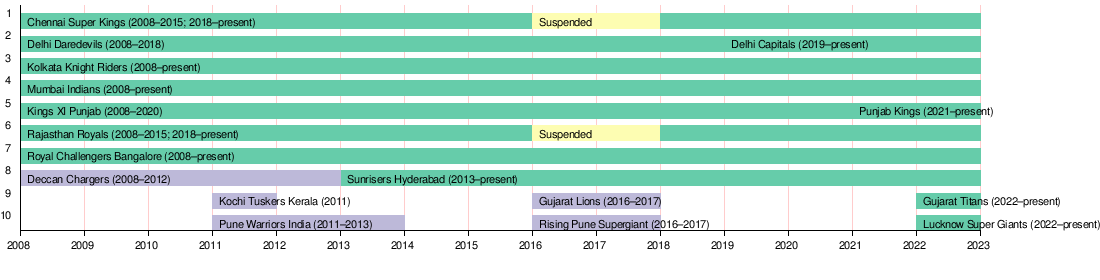

To handle this abnormality, we created nested dictionaries in the ```scrape_espn_cricinfo.py``` webscrapping file that hold the team's id assigned in the ESPN Cricinfo database and the years they have participated in the IPL in. These years will then be iterated through to avoid discrepencies

---
## Scrapping IPL batting stats from ESPN cricinfo

### 1. scrape_batting_stats_espn()
Function to request to espncricinfo stats teamwise, yearwise page and scrape relevant information and add to a temporary dataset.<br>
__Screenshot of a sample page to be web-scrapped:__

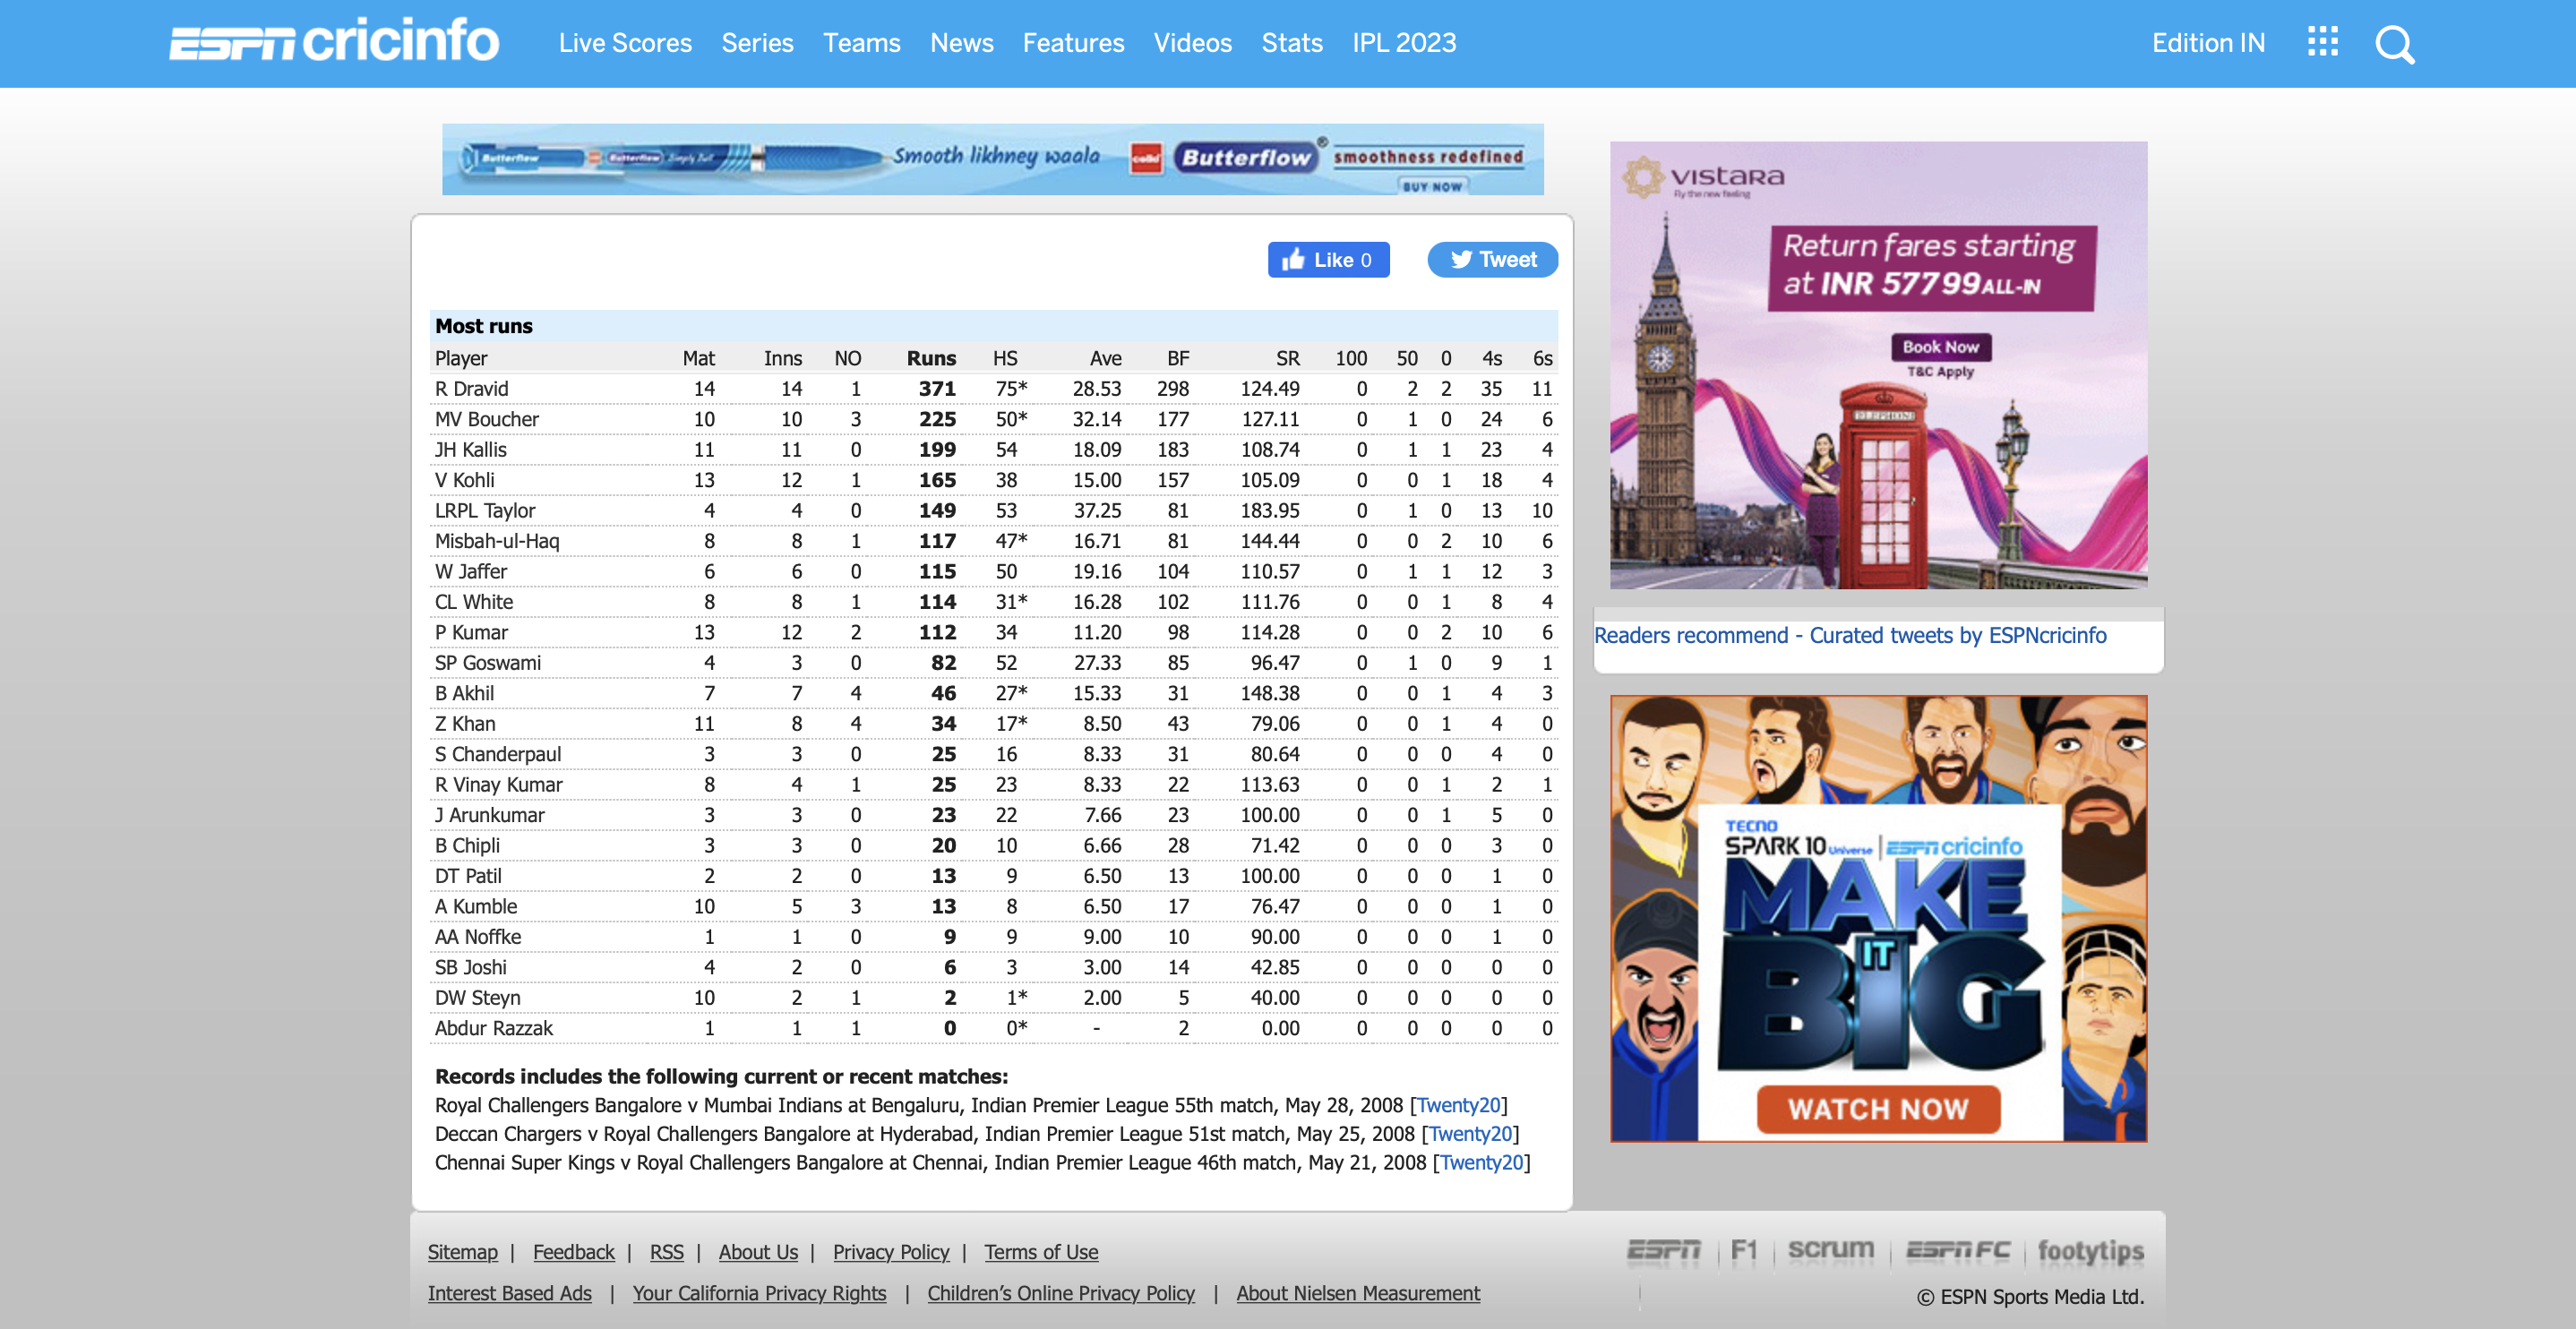

**Year: 2008<br> Team: Royal Challengers Bangalore**<br>
https://stats.espncricinfo.com/ci/engine/records/batting/most_runs_career.html?id=3519;team=4340;type=tournament

### 2. create_batting_stats_dataset()
Function to iterate through all the teams and years, and create the batting dataset by calling the "scrape_batting_stats_espn()" function created earlier.

---

## Scrapping IPL bowling stats from ESPN cricinfo

### 1. scrape_bowling_stats_espn()
Function to request to espncricinfo stats teamwise, yearwise page and scrape relevant information and add to a temporary dataset.<br>
__Screenshot of a sample page to be web-scrapped:__

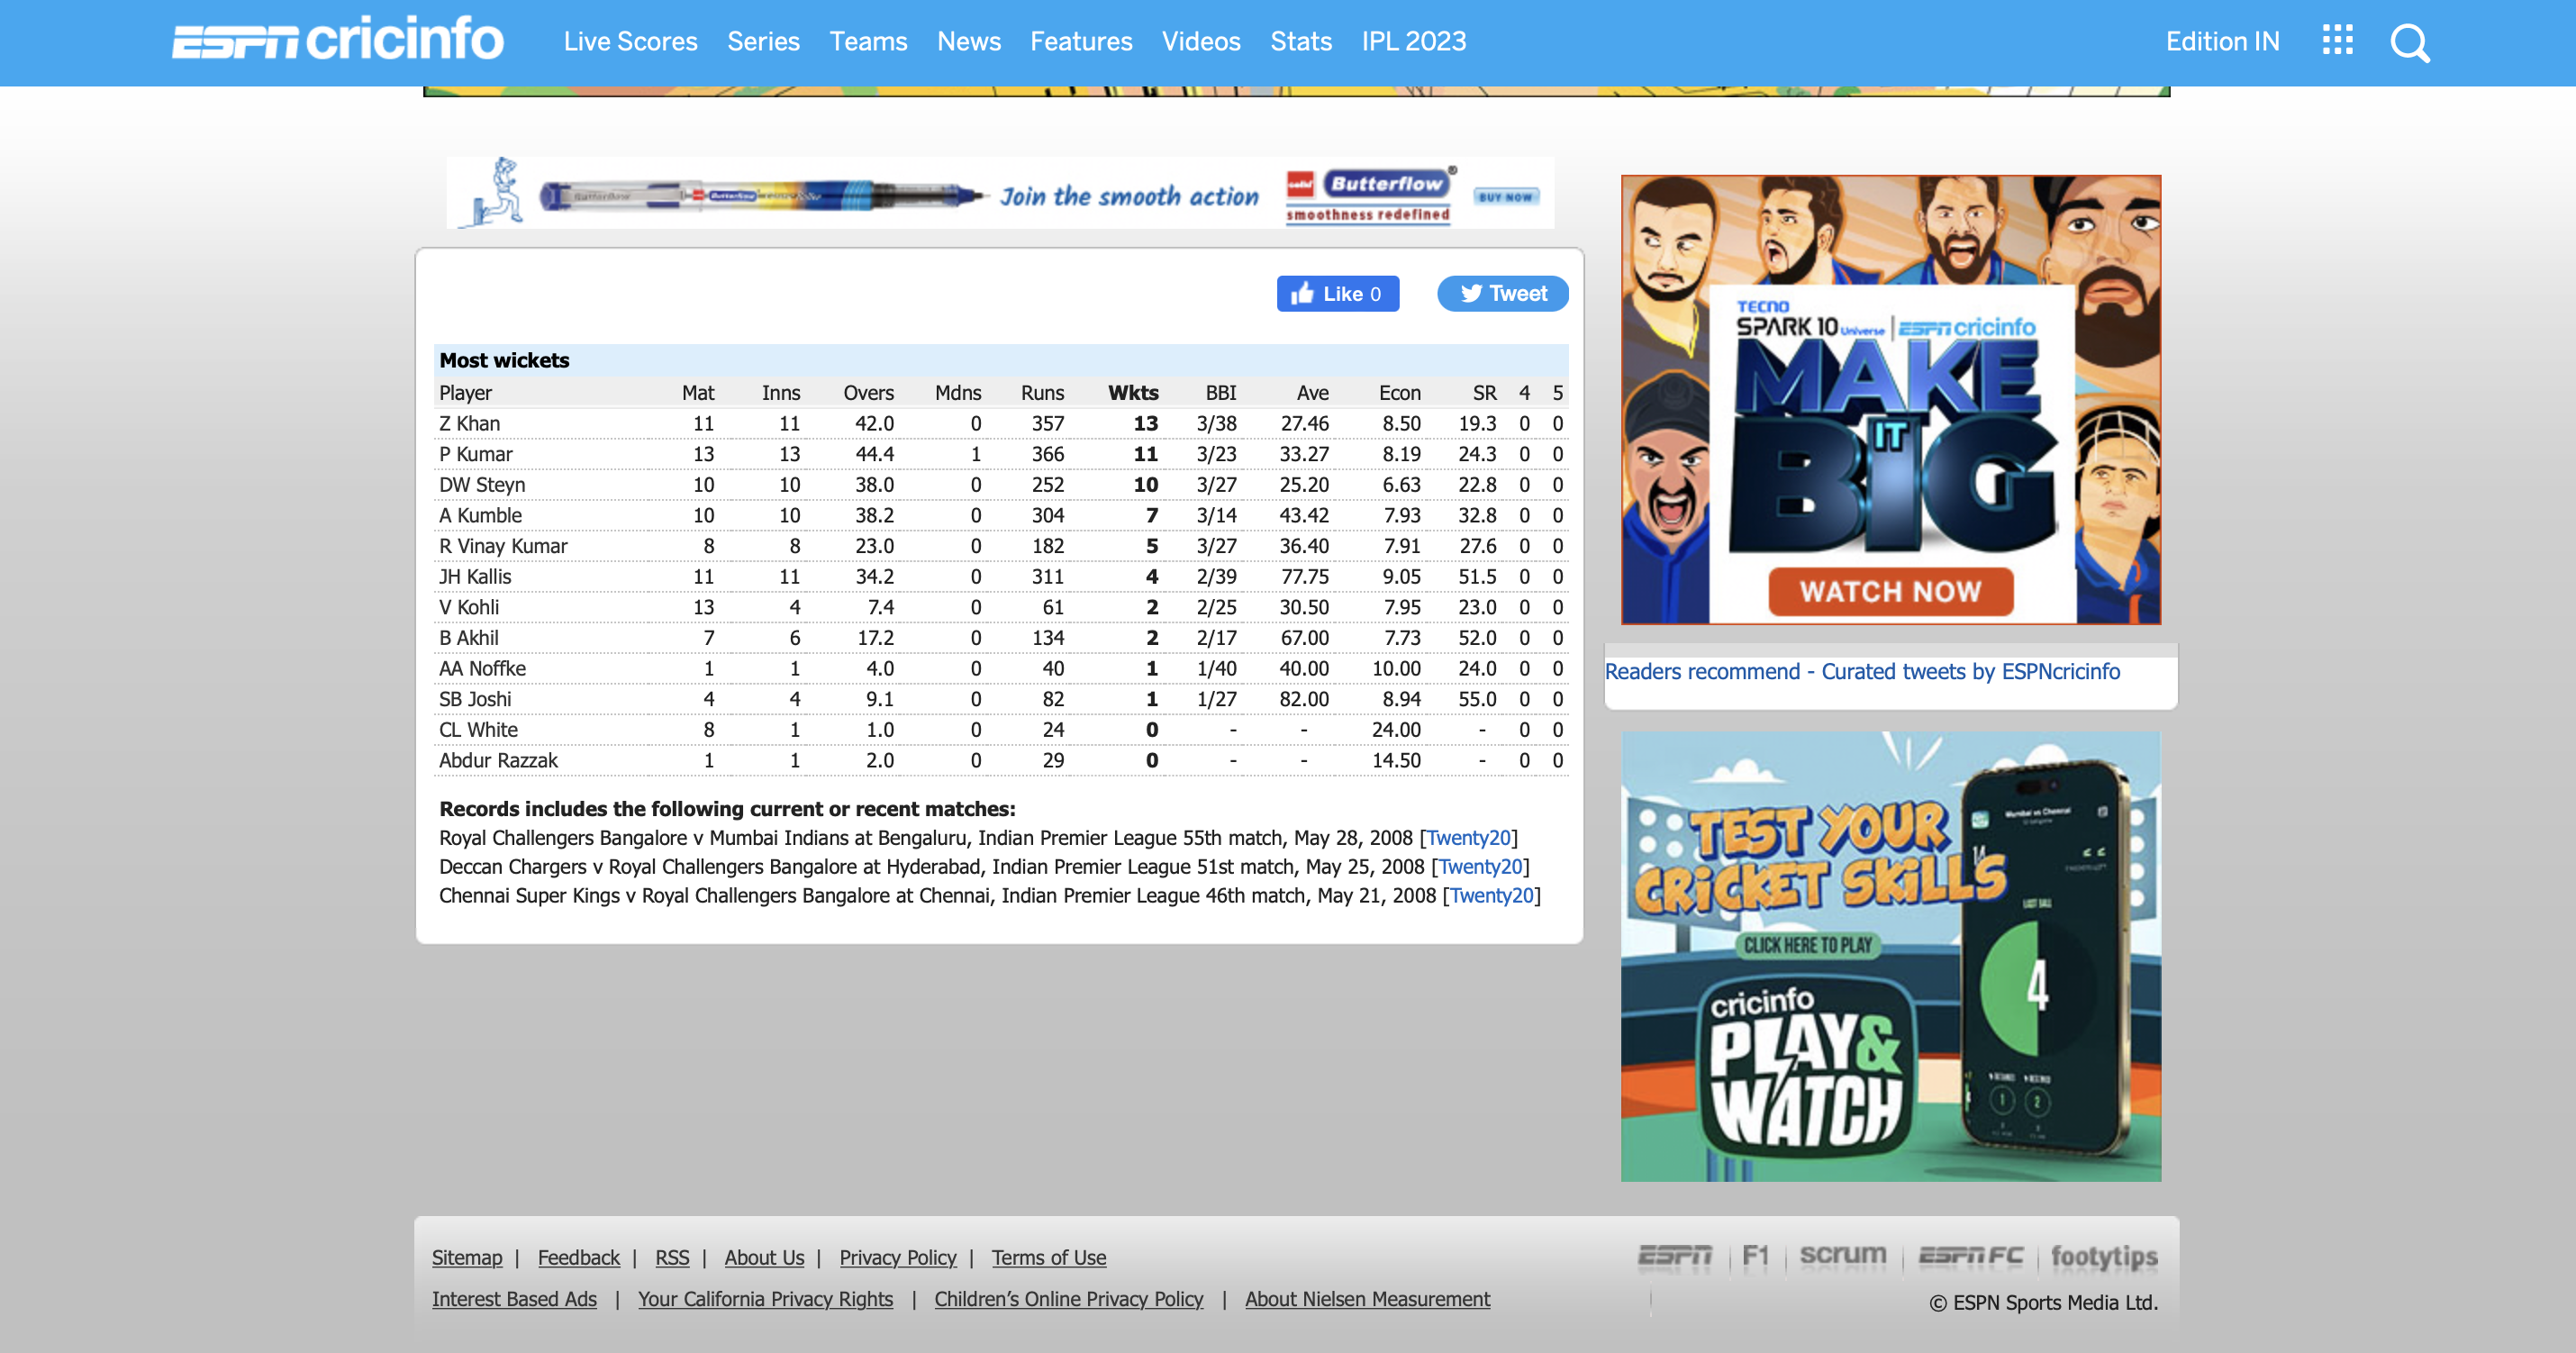

**Year: 2008<br> Team: Royal Challengers Bangalore**<br>
https://stats.espncricinfo.com/ci/engine/records/bowling/most_wickets_career.html?id=3519;team=4340;type=tournament

### 2. create_bowling_stats_dataset()
Function to iterate through all the teams and years, and create the batting dataset by calling the "scrape_bowling_stats_espn()" function created earlier.

# Final Dataset Creation

In [1]:
import pandas as pd
from scrape_espn_cricinfo import create_batting_stats_dataset
from scrape_espn_cricinfo import create_bowling_stats_dataset
import warnings 
warnings.filterwarnings("ignore")

### Web-scrapped Batting and Bowling Dataset
Using the user defined functions created within ```scrape_espn_cricinfo.py``` for webscrapping bowling and batting stats, to create the datasets.

In [8]:
#Creaing the batting specific Dataframe
df_bat = create_batting_stats_dataset()

#Creating the bowling specific Dataframe
df_bowl = create_bowling_stats_dataset()

#Merging both the batting and bowling dataframes as a "Union"
merged_df = pd.merge(df_bowl, df_bat, 
                     on=['player_name', 'team', 'year','matches_played'], 
                     how='outer')

In [9]:
#Batting Dataset Sample
df_bat.sample(4)

player_name                         team  year matches_played  \
1788         MM Sharma                 Punjab Kings  2016             14   
1549          P Chopra             Rajasthan Royals  2018              1   
587   RN ten Doeschate        Kolkata Knight Riders  2013              4   
172          CJ Jordan  Royal Challengers Bangalore  2016              9   

     innings_batted not_outs runs_scored highest_score batting_average  \
1788              6        2          32            15            8.00   
1549              1        0           8             8            8.00   
587               4        1          85            42           28.33   
172               1        0           3             3            3.00   

     balls_faced batting_strike_rate hundreds_scored fifties_scored  \
1788          26              123.07               0              0   
1549           6              133.33               0              0   
587           63              134.92               0              0   
172            4               75.00               0              0   

     ducks_scored fours_scored sixes_scored  
1788            0            3            1  
1549            0            2            0  
587             0            9            2  
172             0            0            0

In [10]:
#Bowling Dataset Sample
df_bowl.sample(4)

player_name                         team  year matches_played  \
194       HV Patel  Royal Challengers Bangalore  2022             15   
291         P Negi          Chennai Super Kings  2015             10   
259       SK Raina          Chennai Super Kings  2012             19   
28   R Vinay Kumar  Royal Challengers Bangalore  2010             14   

    innings_bowled overs_bowled maidens_earned runs_conceded wickets_taken  \
194             15         53.3              2           410            19   
291             10         30.0              0           252             6   
259              7         14.0              0           105             2   
28              14         46.2              0           396            16   

    best_innings_bowling bowling_average economy_rate bowling_strike_rate  \
194                 4/34           21.57         7.66                16.8   
291                 2/25           42.00         8.40                30.0   
259                  1/5           52.50         7.50                42.0   
28                  4/40           24.75         8.54                17.3   

    four_wickets five_wickets  
194            1            0  
291            0            0  
259            0            0  
28             1            0

In [11]:
#Union (Merged) Dataset Sample
merged_df.sample(4)

player_name                         team  year matches_played  \
1549      KV Sharma  Royal Challengers Bangalore  2009              1   
1439       DR Smith                Gujarat Lions  2016             12   
1504     WD Parnell          Pune Warriors India  2013              4   
1737  Yashpal Singh        Kolkata Knight Riders  2009              8   

     innings_bowled overs_bowled maidens_earned runs_conceded wickets_taken  \
1549            NaN          NaN            NaN           NaN           NaN   
1439              8         18.0              0           153             8   
1504              4         14.5              0           137             6   
1737            NaN          NaN            NaN           NaN           NaN   

     best_innings_bowling  ... runs_scored highest_score batting_average  \
1549                  NaN  ...           1             1            1.00   
1439                  4/8  ...         324            73           29.45   
1504                 3/27  ...           5             5            5.00   
1737                  NaN  ...          47            20           11.75   

     balls_faced batting_strike_rate hundreds_scored fifties_scored  \
1549           3               33.33               0              0   
1439         221              146.60               0              3   
1504           7               71.42               0              0   
1737          66               71.21               0              0   

     ducks_scored fours_scored sixes_scored  
1549            0            0            0  
1439            1           35           16  
1504            0            0            0  
1737            0            5            0  

[4 rows x 27 columns]

### Team-wise Finishing Position dataset (TARGET VARIABLE)
I manually extracted finishing position data of IPL teams each year, and created a CSV file that I then imported.<br>
__Link__: https://en.wikipedia.org/wiki/List_of_Indian_Premier_League_seasons_and_results

In [26]:
#Importing the teamwise finishing position dataset
df_finishing_pos = pd.read_csv("Finishing_Position_IPL.csv")
df_finishing_pos 

Team 2008 2009 2010  2011 2012 2013 2014 2015 2016  \
0           Chennai Super Kings  2nd   SF  1st   1st  2nd  2nd  3rd  2nd  NaN   
1                Delhi Capitals   SF   SF  5th  10th  3rd  9th  8th  7th  6th   
2         Kolkata Knight Riders  6th  8th  6th   4th  1st  7th  1st  5th  4th   
3                Mumbai Indians  5th  7th  2nd   3rd  4th  1st  4th  1st  5th   
4                  Punjab Kings   SF  5th  8th   5th  6th  6th  2nd  8th  8th   
5              Rajasthan Royals  1st  6th  7th   6th  7th  3rd  5th  4th  NaN   
6   Royal Challengers Bangalore  7th  2nd  3rd   2nd  5th  5th  7th  3rd  2nd   
7           Sunrisers Hyderabad  NaN  NaN  NaN   NaN  NaN  4th  6th  6th  1st   
8                Gujarat Titans  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN   
9          Lucknow Super Giants  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN   
10              Deccan Chargers  8th  1st  4th   7th  8th  NaN  NaN  NaN  NaN   
11                Gujarat Lions  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  3rd   
12         Kochi Tuskers Kerala  NaN  NaN  NaN   8th  NaN  NaN  NaN  NaN  NaN   
13          Pune Warriors India  NaN  NaN  NaN   9th  9th  8th  NaN  NaN  NaN   
14      Rising Pune Supergiants  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  7th   

   2017 2018 2019 2020 2021  2022  
0   NaN  1st  2nd  7th  1st   9th  
1   6th  8th  3rd  2nd  3rd   5th  
2   3rd  3rd  5th  5th  2nd   7th  
3   1st  5th  1st  1st  5th  10th  
4   5th  7th  6th  6th  6th   6th  
5   NaN  4th  7th  8th  7th   2nd  
6   8th  6th  8th  4th  4th   3rd  
7   4th  2nd  4th  3rd  8th   8th  
8   NaN  NaN  NaN  NaN  NaN   1st  
9   NaN  NaN  NaN  NaN  NaN   4th  
10  NaN  NaN  NaN  NaN  NaN   NaN  
11  7th  NaN  NaN  NaN  NaN   NaN  
12  NaN  NaN  NaN  NaN  NaN   NaN  
13  NaN  NaN  NaN  NaN  NaN   NaN  
14  2nd  NaN  NaN  NaN  NaN   NaN

__User Defined Function:__ To map a team's final finishing position (Target Variable) to the original dataset

In [27]:
#Adding Final Positions of each team to each player in the dataset
def add_final_position(df,positoin_df):
    pos_arr = []
    #Iterating through all instances
    for i in range(len(df)):
        
        #Team and Year of Player
        team_i = df.iloc[i][1]
        year_i = df.iloc[i][2]
        
        #Mapping the finishing position dataset value to the individual team player's row
        finishing_position_i = str(positoin_df[positoin_df["Team"]==team_i][str(year_i)]).split()[1]
        
        pos_arr.append(finishing_position_i)
        
    df['TARGET(position)'] = pos_arr
    
    return df 

In [28]:
df_final = add_final_position(merged_df, df_finishing_pos)

In [40]:
df_final.sample(3)

player_name                         team  year matches_played  \
105        AN Ahmed  Royal Challengers Bangalore  2015              3   
1728        WP Saha        Kolkata Knight Riders  2008             12   
1910  KS Williamson          Sunrisers Hyderabad  2017              7   

     innings_bowled overs_bowled maidens_earned runs_conceded wickets_taken  \
105               3         12.0              0           128             1   
1728            NaN          NaN            NaN           NaN           NaN   
1910            NaN          NaN            NaN           NaN           NaN   

     best_innings_bowling  ... highest_score batting_average balls_faced  \
105                  1/28  ...            5*           10.00           5   
1728                  NaN  ...           59*           31.80         119   
1910                  NaN  ...            89           42.66         169   

     batting_strike_rate hundreds_scored fifties_scored ducks_scored  \
105               200.00               0              0            0   
1728              133.61               0              1            0   
1910              151.47               0              2            0   

     fours_scored sixes_scored TARGET(position)  
105             2            0              3rd  
1728           12            7              6th  
1910           20           10              4th  

[3 rows x 28 columns]

In [30]:
#Exporting the dataset, as an uncleaned dataset
df_final.to_csv("uncleaned_dataset.csv", index=False)